In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\ML_Project\Notebooks\flights.csv")

In [3]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [4]:
df.shape

(452088, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [6]:
df.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [7]:
print("Airlines:", end=" ")
print(df.Airline.unique(), "\n")
print("Seat Classes:", end=" ")
print(df.Class.unique())
print("Departure Airports:",end=" ")
print(sorted(df.Source.unique()))
print("Destination Airports:",end=" ")
print(sorted(df.Destination.unique()))
print("Total Stops:", end=" ")
print(sorted(df["Total_stops"].unique()))

Airlines: ['SpiceJet' 'Indigo' 'GO FIRST' 'Air India' 'AirAsia' 'Vistara' 'AkasaAir'
 'AllianceAir' 'StarAir'] 

Seat Classes: ['Economy' 'Premium Economy' 'Business' 'First']
Departure Airports: ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']
Destination Airports: ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']
Total Stops: ['1-stop', '2+-stop', 'non-stop']


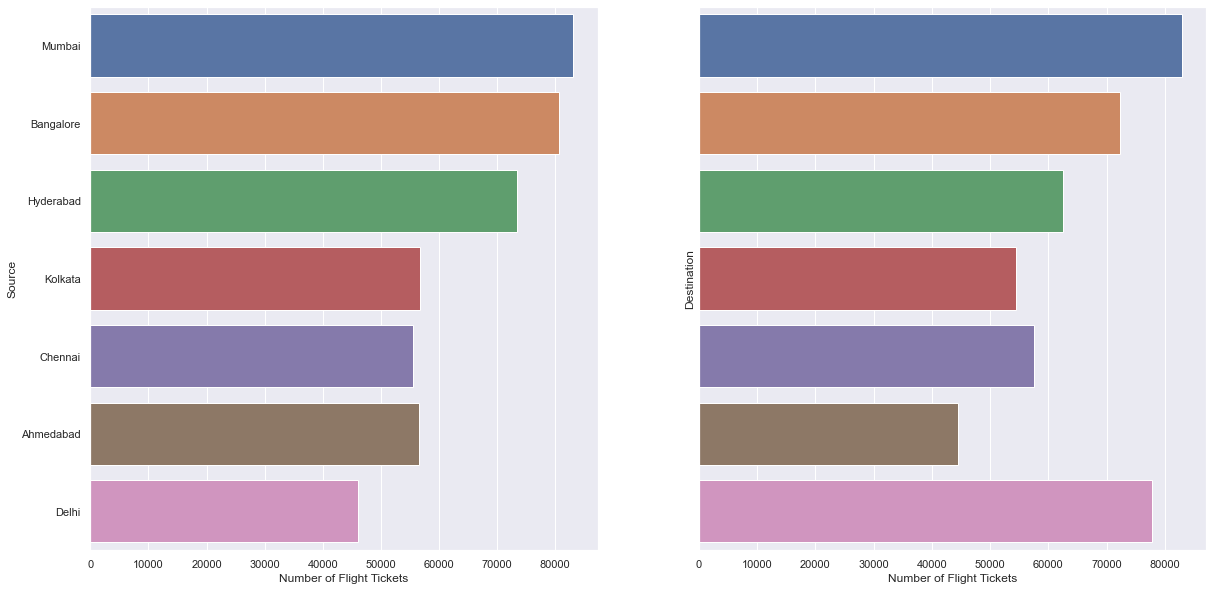

In [8]:
# Lets first find the number of flights flying from and to each airport
sns.set(style='darkgrid')
fig,axs = plt.subplots(1,2, figsize=(20,10),sharey=True)
sns.countplot(data=df,y="Source",ax=axs[0])
sns.countplot(data=df,y="Destination",ax=axs[1])
for ax in axs:
    ax.set_xlabel('Number of Flight Tickets')
plt.show()

In [9]:
df.Class.value_counts()

Economy            252033
Business           126834
Premium Economy     73077
First                 144
Name: Class, dtype: int64

In [10]:
df=df[df.Class!="First"].reset_index()

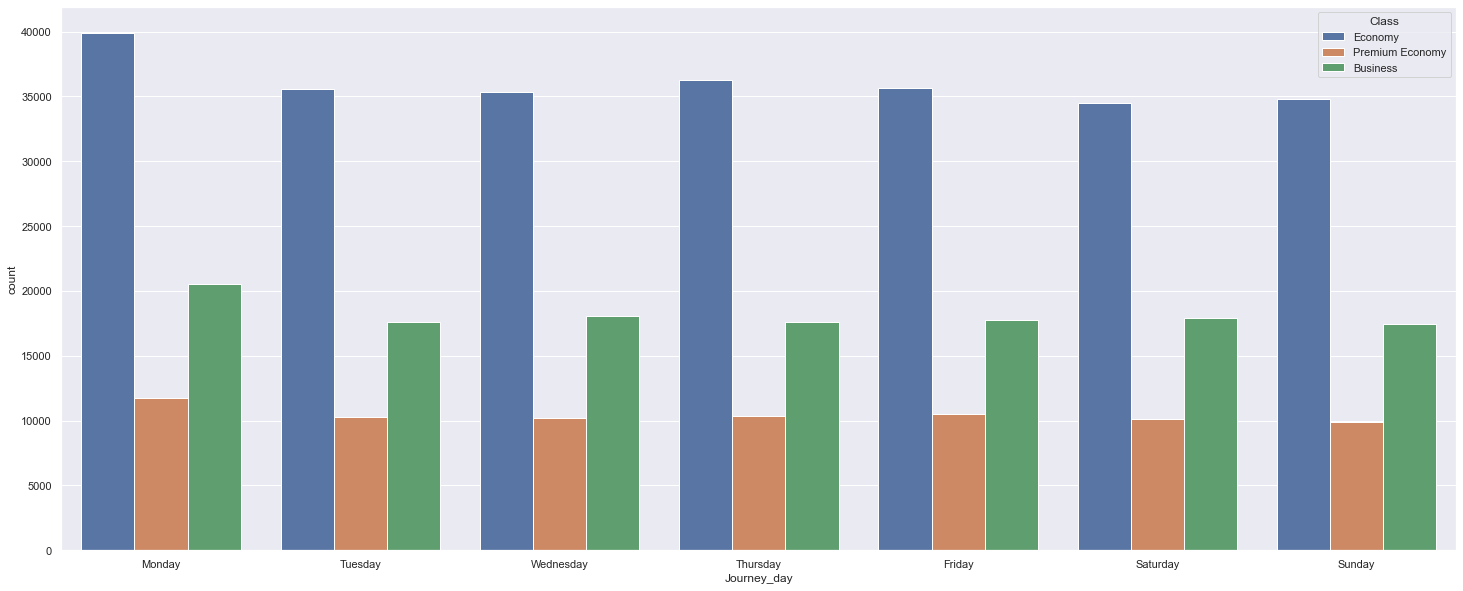

In [11]:
plt.figure(figsize=(25,10))
sns.countplot(x=df.Journey_day,hue=df.Class)
plt.show()

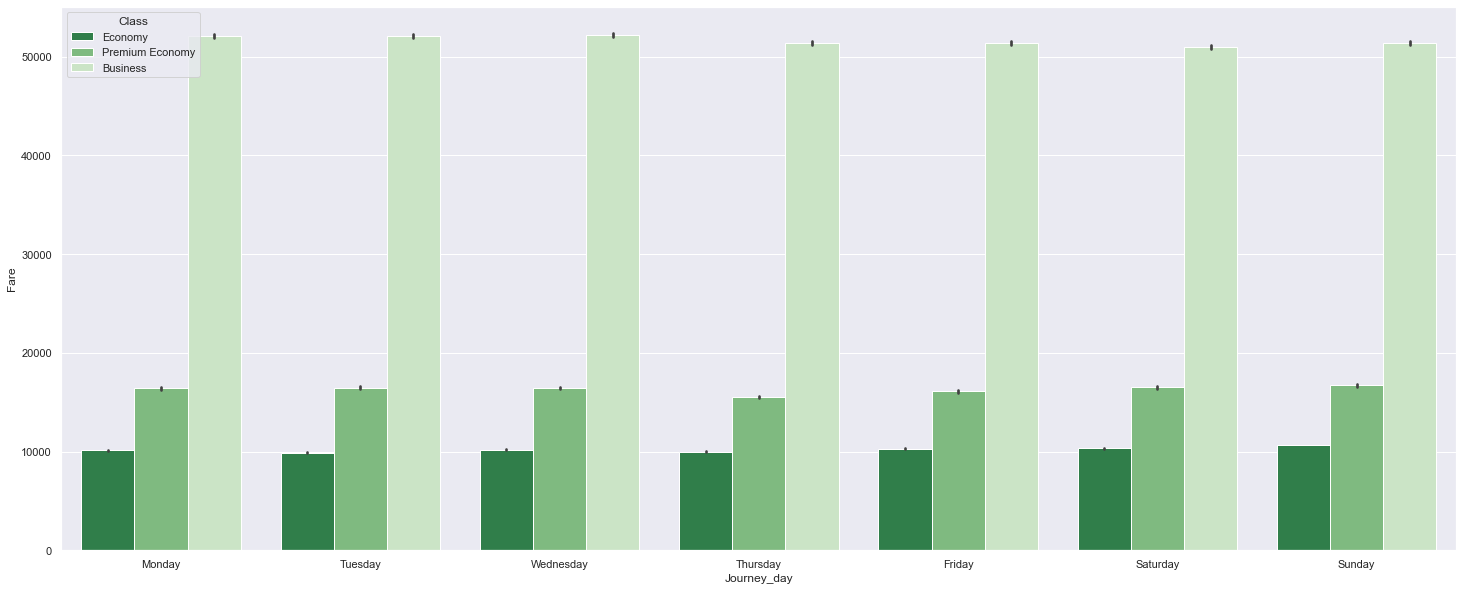

In [12]:
plt.figure(figsize=(25,10))
sns.barplot(x=df.Journey_day,y=df.Fare,hue=df.Class,palette="Greens_r")
plt.show()

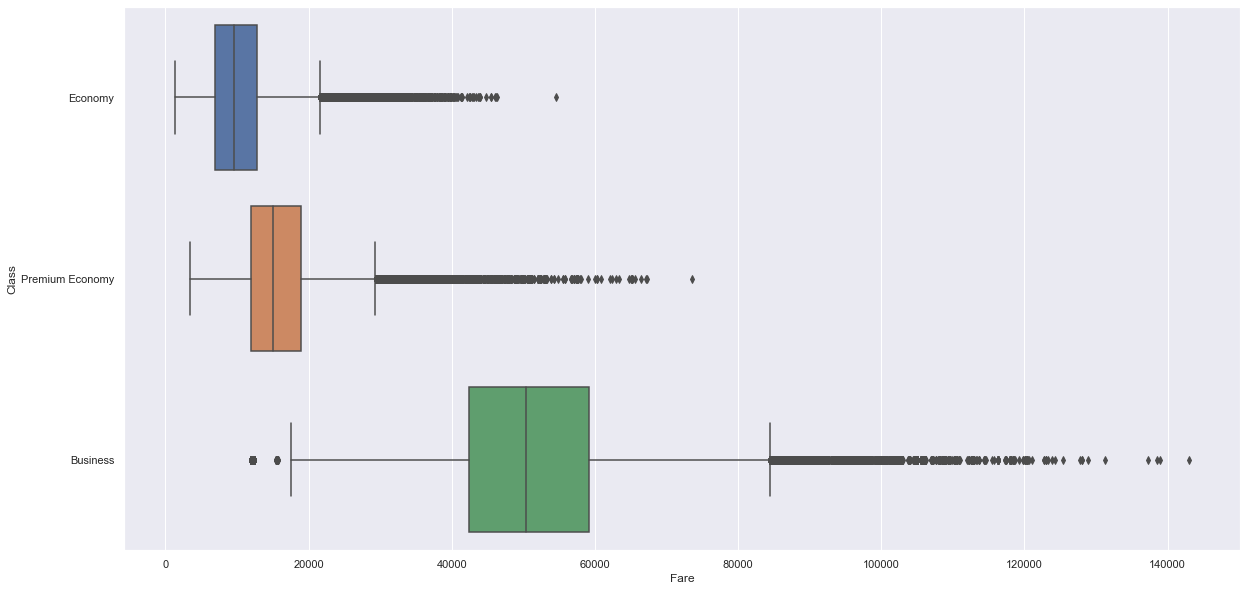

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Fare,y=df.Class)
plt.show()

In [14]:
df.Class.value_counts()

Economy            252033
Business           126834
Premium Economy     73077
Name: Class, dtype: int64

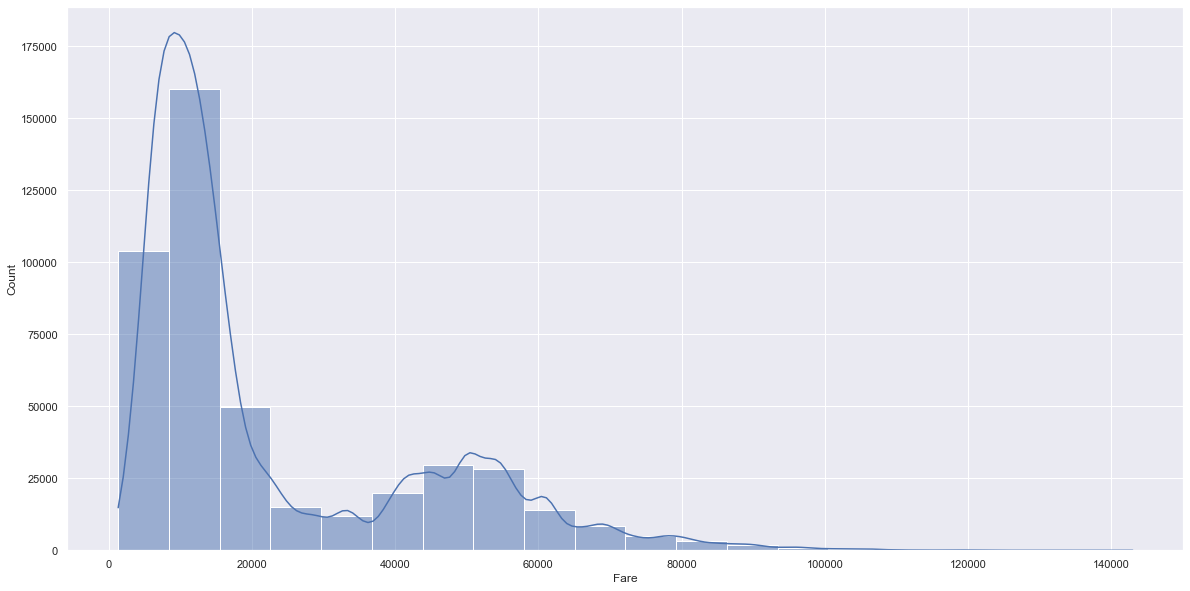

In [15]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare,kde=True,bins=20)
plt.show()

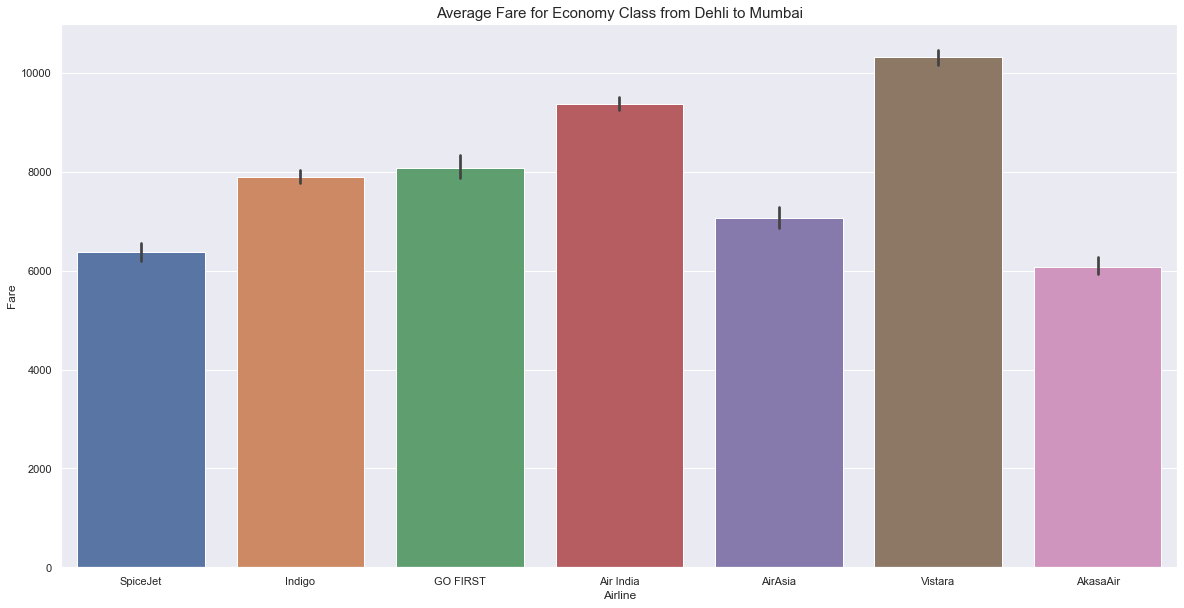

In [28]:
# From dehli to mumbai, lets see which airline has the cheapest economy class
plt.figure(figsize=(20,10))
sns.barplot(data=df[(df.Source == "Delhi") & (df["Class"] == "Economy") & (df.Destination == "Mumbai")],x="Airline",y="Fare")
plt.title("Average Fare for Economy Class from Dehli to Mumbai", size=15)
plt.show()

In [17]:
#plt.figure(figsize=(20,10))
#sns.scatterplot(data=df[df.Source=="Delhi"],x="Duration_in_hours",y="Fare")
#plt.show()

In [18]:
durations = df[df.Total_stops=="non-stop"].groupby(["Source","Destination"]).mean()["Duration_in_hours"]
durations

Source     Destination
Ahmedabad  Bangalore      2.177954
           Chennai        2.389990
           Delhi          1.550684
           Hyderabad      1.793842
           Kolkata        2.416660
           Mumbai         1.307204
Bangalore  Ahmedabad      2.273115
           Chennai        1.074526
           Delhi          2.808003
           Hyderabad      1.316050
           Kolkata        2.534974
           Mumbai         1.825508
Chennai    Ahmedabad      2.388222
           Bangalore      1.019003
           Delhi          2.833680
           Hyderabad      1.316782
           Kolkata        2.315756
           Mumbai         2.029955
Delhi      Ahmedabad      1.653036
           Bangalore      2.828462
           Chennai        2.831671
           Hyderabad      2.214573
           Kolkata        2.122704
           Mumbai         2.241987
Hyderabad  Ahmedabad      1.793779
           Bangalore      1.293318
           Chennai        1.419788
           Delhi          2.3678

In [19]:
print(f"On Average, the longest non-stop flights {round(durations.max(),2)} hours are from {durations.idxmax()[0]} to {durations.idxmax()[1]}.")
print(f"On Average, the shortest non-stop flights {round(durations.min(),2)} hours are from {durations.idxmin()[0]} to {durations.idxmin()[1]}.")

On Average, the longest non-stop flights 2.97 hours are from Kolkata to Mumbai.
On Average, the shortest non-stop flights 1.02 hours are from Chennai to Bangalore.


In [20]:
# Lets see the effect of stops on the Fare

In [21]:
stops=df.Total_stops.unique()
stops

array(['non-stop', '1-stop', '2+-stop'], dtype=object)

In [22]:
df.Total_stops = df.Total_stops.apply(lambda x: 'One Stop' if x=='1-stop' else 'Two+ Stops' if x=='2+-stop' else x)
stops=df.Total_stops.unique()
stops

array(['non-stop', 'One Stop', 'Two+ Stops'], dtype=object)

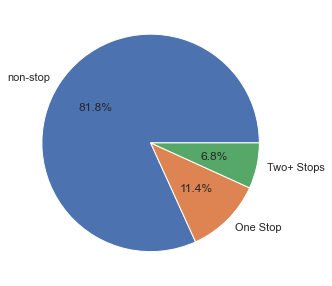

In [23]:
plt.figure(figsize=(5,5))
plt.pie(df.Total_stops.value_counts(),labels=stops,autopct='%1.1f%%')
plt.show()

In [24]:
# Although the number of stops generally effects the fare price, it would not be the right approach to measure the average
# flight fare for these 3 different group as flight routes also effect fair price.
# So it would be better to compare the fare price for these three groups when the Source and Destination is the same.
# We will try to find a Source-Destination pair where each group has a good number of flights. 
# One such pair is Kolkata-Mumbai

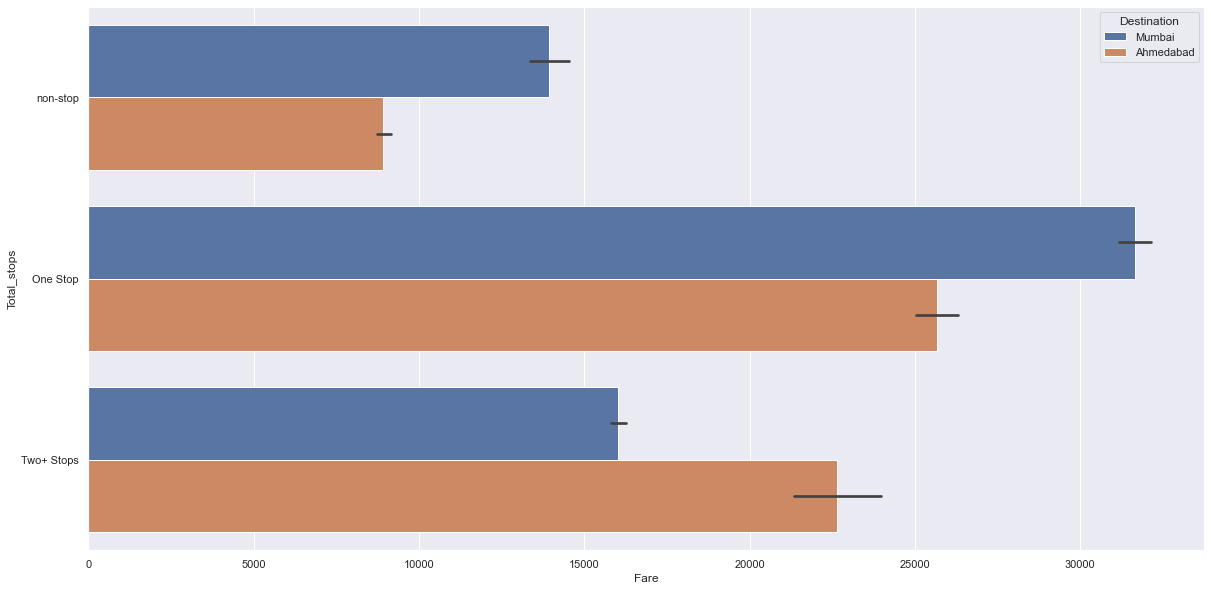

In [45]:
plt.figure(figsize=(20,10))
sns.barplot(data=df[(df.Source=="Kolkata")&((df.Destination=="Mumbai") | (df.Destination=="Ahmedabad"))], y="Total_stops",x="Fare",hue="Destination")
plt.show()

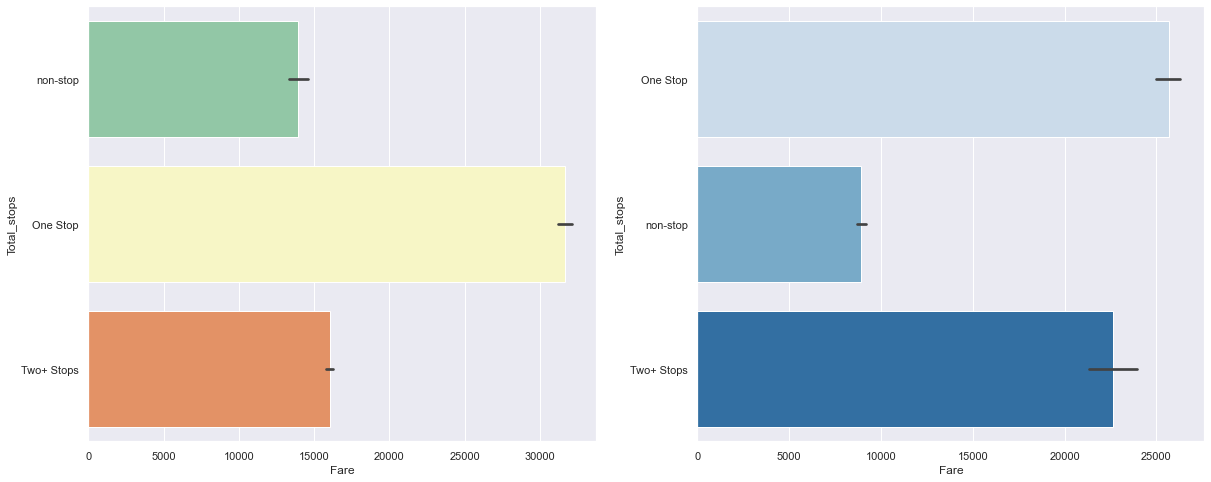

In [32]:
#fig,ax=plt.subplots(1,2,figsize=(20,8))
#sns.barplot(data=df[(df.Source=="Kolkata")&(df.Destination=="Mumbai")], y="Total_stops",x="Fare",palette="Spectral_r",ax=ax[0])
#sns.barplot(data=df[(df.Source=="Kolkata")&(df.Destination=="Ahmedabad")], y="Total_stops",x="Fare",palette="Blues",ax=ax[1])
#plt.show()